In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


In [14]:
from sklearn.datasets import load_iris

iris = load_iris(as_frame=True).frame

iris.drop("target",axis=1, inplace=True)
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


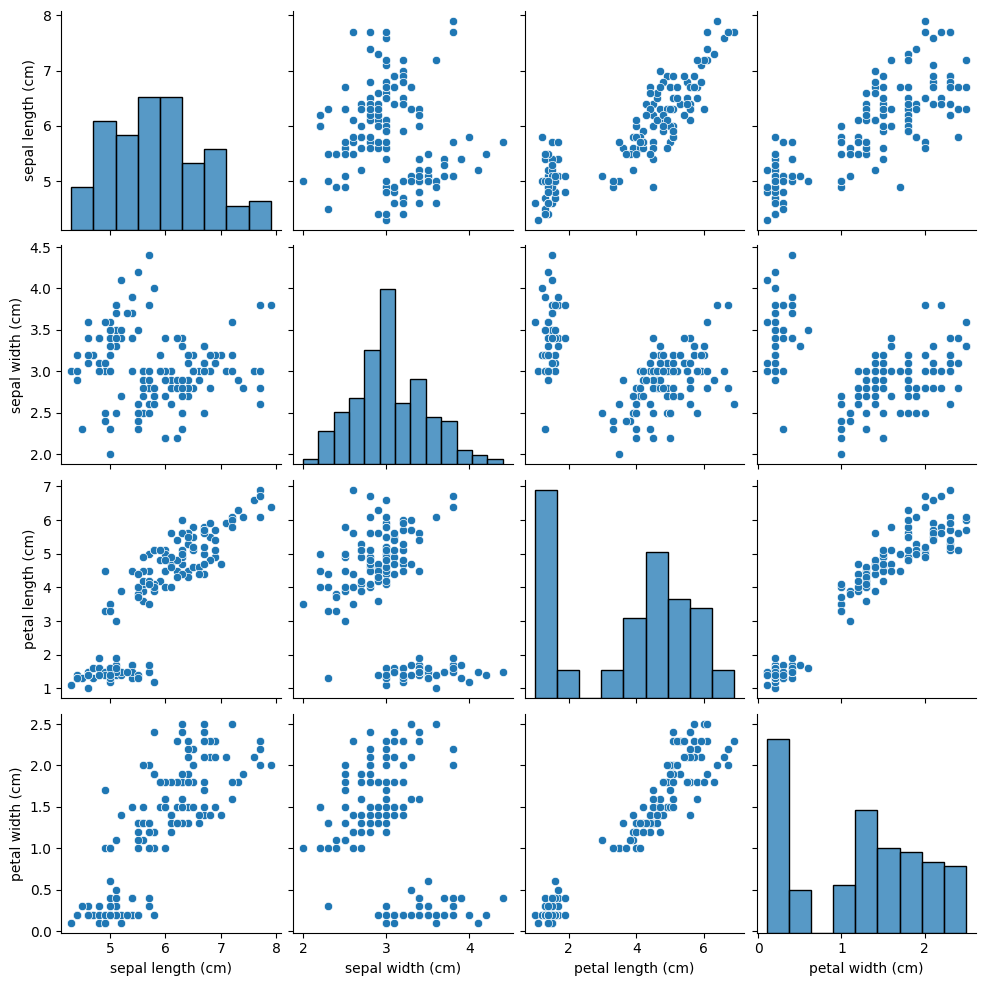

In [15]:
sns.pairplot(data=iris)
plt.show()

In [16]:
wcss = []
for i in range(1,10):
    kmn = KMeans(n_clusters=i , init="k-means++")
    kmn.fit(iris)
    wcss.append(kmn.inertia_)

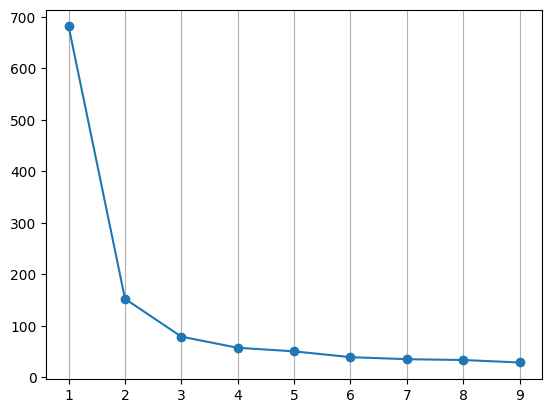

In [17]:
plt.plot([i for i in range(1,10)],wcss ,marker = "o")
plt.grid(axis="x")
plt.show()

In [18]:
kmn = KMeans(n_clusters=3,init="k-means++")
iris["predict"] = kmn.fit_predict(iris)
iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),predict
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,0
148,6.2,3.4,5.4,2.3,0


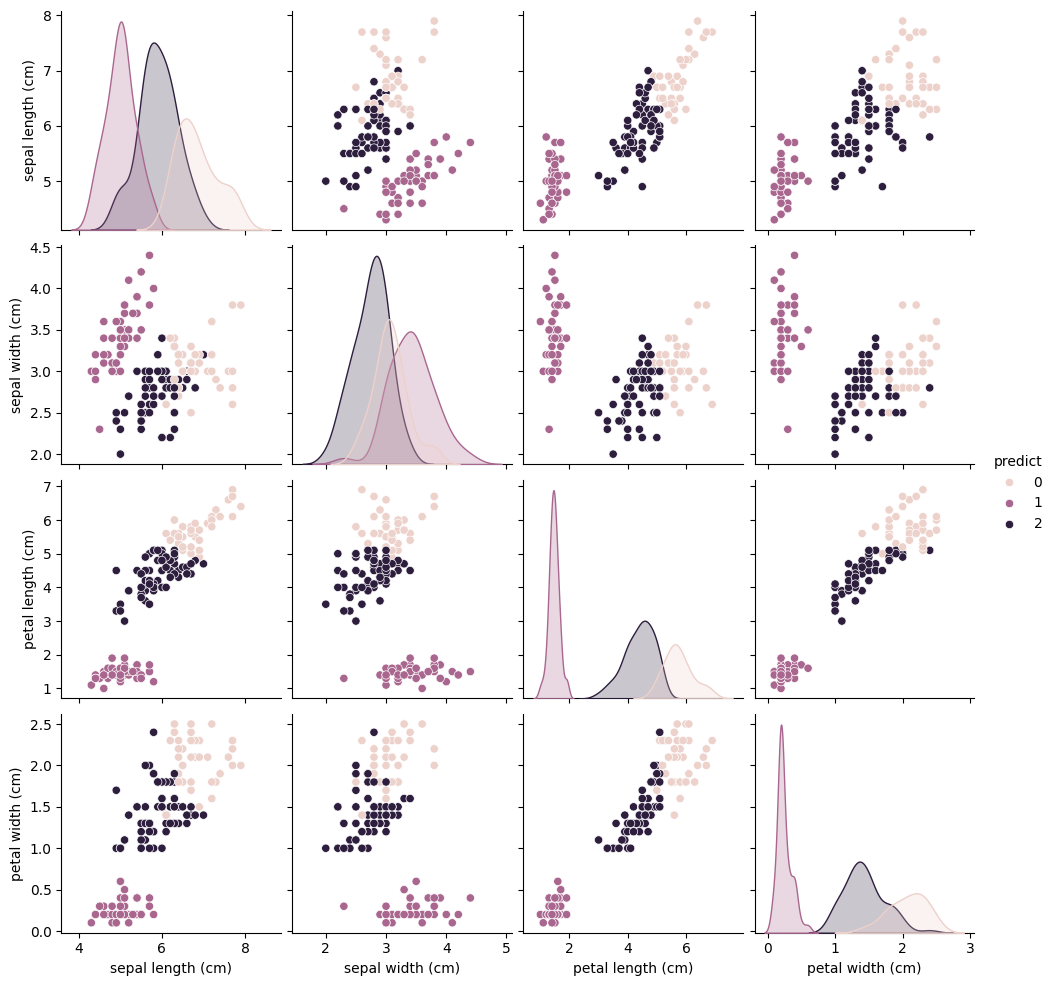

In [19]:
sns.pairplot(data=iris,hue = "predict")
plt.show()

Silhout score

In [20]:
silhouette_score(iris, kmn.labels_, metric="euclidean")

np.float64(0.6851559988597147)

In [21]:

ss = []
for i in range (2,10):  # loop must be start from 2 , beacuse slihoutte cant measssure the data for one cluster, cluster must be al least 2
    km1 = KMeans(n_clusters=i)
    km1.fit(iris)
    ss.append(silhouette_score(iris,km1.labels_ ))

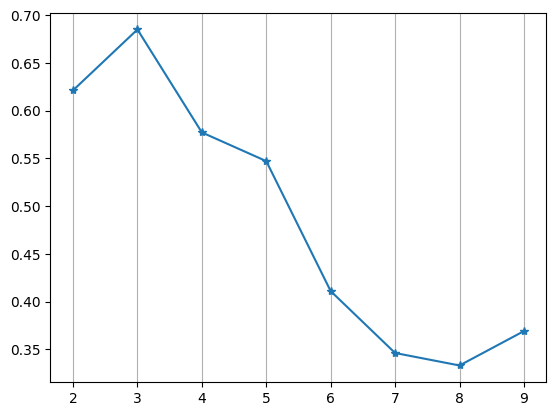

In [22]:

plt. plot ([j for j in range(2,10)], ss , marker = "*")
plt.grid(axis="x")
plt.show()